

> 

Name: Dhruuv agarwal



## Task :1 MNIST classification using NN



In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Below we start with declaring the essential parameters for the structure of the neural network.

As can be seen, the number of layer is 5, with each containing 1024 units.

The final layer is softmax layer and needs 10 predicted values for 0-9 labels for each sample. So number of classes is 10.

The input image is of 28*28 pixel dimension. So we have a one hot strecthed vector of dimension 1 and 784.

The batch size chosen is 200.

In [0]:
n_hiddenlayer = 5
n_hiddenunits = 1024
n_classes = 10
n_inpsize = 784
batch_size = 200

Xinp = tf.placeholder('float',[None,n_inpsize])
y = tf.placeholder('float')

sizes = [n_inpsize]
[sizes.append(n_hiddenunits) for i in range(n_hiddenlayer)]
sizes.append(n_classes)

hiddenlayers = [[] for i in range(n_hiddenlayer+1)]


Below is the low level implementation for the graph structure to be built. 
Here instead of using tf layers we define the layers implicitly, with weights and bias terms at each. 

Then we combine them as
activation(W*X+bias)
and the acitvation selected is Relu.


In [0]:
last = []
layers = [0.0 for i in range(n_hiddenlayer)]
def NN_graph(data):
  #initializer = tf.contrib.layers.xavier_initializer()
  initializer = tf.contrib.layers.variance_scaling_initializer()
  for i in range(n_hiddenlayer+1):
    hiddenlayers[i] = {'weights': tf.Variable(initializer([sizes[i],sizes[i+1]])),
    'biases' :tf.Variable(initializer([sizes[i+1]])) }
  
  
  layers.insert(0,data)
  for i in range(0,n_hiddenlayer):
    tmp = tf.nn.relu(tf.add(tf.matmul(layers[i], hiddenlayers[i]['weights']), hiddenlayers[i]['biases']))
    layers[i+1] = tmp
  print(layers)
  return tf.add(tf.matmul(layers[-1], hiddenlayers[-1]['weights']), hiddenlayers[-1]['biases'])  
  
  

Below is the training part required for q1 part 2.

Here we use the structure/graph created and feed input values in batches. 
Before that we initialize other variables with He initialization, to get better results faster than normal initialization.

The number of epochs is chosen to be 100.

In [0]:
output = []
lastlayer = []
layerdata = []
def train_nn(X):
  global output
  global lastlayer
  global layerdata
  pred = NN_graph(X)
  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=pred))
  optimizer = tf.train.AdamOptimizer().minimize(cost)
  
  n_epochs = 100
  
  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(n_epochs):
      loss = 0
      for i in range(int(mnist.train.num_examples/batch_size)):
        ex,ey = mnist.train.next_batch(batch_size)
        _,c = sess.run([optimizer,cost],feed_dict={Xinp:ex,y:ey})
        loss += c
      print('Epoch',epoch,' out of ',n_epochs,' loss:',loss)
    correct = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
    output_vec = tf.reduce_mean(tf.cast(tf.argmax(pred,1),'float'))
    
    accuracy = tf.reduce_mean(tf.cast(correct,'float'))
    #output  = pred

    #layer = sess.run(layers[-1])
    print('accuracy:',accuracy.eval({Xinp:mnist.test.images,y:mnist.test.labels}))
    output = pred.eval({Xinp:mnist.test.images[0:1000,:],y:mnist.test.labels[0:1000,:]})
    #lastlayer = sess.run(hiddenlayers)
    lastlayer  = sess.run(layers,feed_dict = {Xinp:mnist.test.images[0:1000,:],y:mnist.test.labels[0:1000,:]})
    
    #print('softmax_output:',output_vec.eval({Xinp:mnist.test.num_examples(1000),y:mnist.test.labels[1000,:]}))
    
        

In [0]:
train_nn(Xinp)
tf.print(output.shape)



Epoch 64  out of  100  loss: 1.8846423633080178
Epoch 65  out of  100  loss: 1.4032480552320512
Epoch 66  out of  100  loss: 2.7706561660295392
Epoch 67  out of  100  loss: 1.6745030356335917
Epoch 68  out of  100  loss: 1.6513297738214874
Epoch 69  out of  100  loss: 2.2858649043280366
Epoch 70  out of  100  loss: 1.4619665564647732
Epoch 71  out of  100  loss: 1.5054631989556722
Epoch 72  out of  100  loss: 2.2457052294989097
Epoch 73  out of  100  loss: 2.0249562176222753
Epoch 74  out of  100  loss: 1.3958233384796301
Epoch 75  out of  100  loss: 1.6628611540848297
Epoch 76  out of  100  loss: 0.4326363256121084
Epoch 77  out of  100  loss: 1.5244003963919681
Epoch 78  out of  100  loss: 0.7304937716463709
Epoch 79  out of  100  loss: 0.9932440926316699
Epoch 80  out of  100  loss: 4.846812911659278
Epoch 81  out of  100  loss: 2.6929046759453286
Epoch 82  out of  100  loss: 0.6866370261554011
Epoch 83  out of  100  loss: 1.6910613932726006
Epoch 84  out of  100  loss: 1.5976839993

<tf.Operation 'PrintV2_1' type=PrintV2>

In [0]:
print(output.shape)
test_images = mnist.test.images[0:1000,:]
ytest = mnist.test.labels[0:1000,:]

(1000, 10)


In [0]:
print(output)

[[-139.21375    -53.705975   -60.78599   ...    2.1500173 -146.92694
   -72.07786  ]
 [-190.88835   -295.34088    -25.243113  ... -173.7652    -184.68544
  -191.62392  ]
 [ -80.54699     26.743084   -80.823364  ... -101.487144   -72.68165
  -183.9853   ]
 ...
 [   7.175395  -351.79044   -152.4412    ... -280.8814    -173.64856
  -139.79881  ]
 [ -21.47283    -28.183401   -20.98832   ...  -36.290287     4.7686343
   -18.266554 ]
 [ -44.02005    -49.90776    -33.280663  ...  -21.937834   -32.112274
    -3.5150104]]


Below is the Q1 p3 plot and solution.

Here we use argpartition to sort out the top 10 entries in each column(i.e. each label) in linear time. 
After this we get the 10 by 10 as asked.

Here each row repsents the input images corresponding the max probability values at the output for the label.

This is useful to notice what does the model most confidently classifies the label.

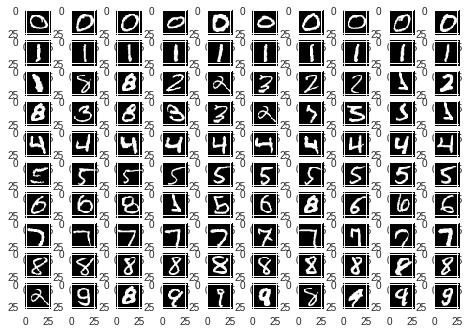

In [0]:
plt.figure(0)
top_rows = np.argpartition(-output,10,axis=0)
for i in range(10):
    for j in range(10):
      ax = plt.subplot2grid((10,10),(i,j))
      ax.imshow(np.reshape(test_images[top_rows[j,i]], [28, 28]), cmap='gray')
plt.show()
    

Below, the Q1 p4 solution and plot can be seen.

As asked the column out of 1024 was chosen at random and used like in p3 to get max probability rows for that column.

However, as expected there are many columns which are just zero vectors. 
This was expected as ideally afer all the layers the final hidden layer, should signify more information and that with confidence. So at this stage the irrelavant columns get eliiminated of sorts so the values go to zero.

The only important columns remain and are used to fire the activation at the final layer.



[[ 0.       0.       0.      ...  0.       0.       0.     ]
 [ 0.       0.      53.42832 ...  0.       0.       0.     ]
 [ 0.       0.       0.      ...  0.       0.       0.     ]
 ...
 [ 0.       0.       0.      ...  0.       0.       0.     ]
 [ 0.       0.       0.      ...  0.       0.       0.     ]
 [ 0.       0.       0.      ...  0.       0.       0.     ]]


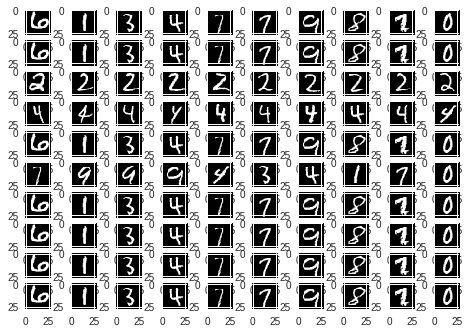

In [0]:
plt.figure(1)
rand_cols = np.random.randint(lastlayer[-1].shape[1], size=10)
seclast = lastlayer[-1][:,rand_cols]
seclast.shape
#print(seclast)
top_rows2 = np.argpartition(-seclast,10,axis=0)
#print(top_rows2)
for i in range(10):
    for j in range(10):
      ax = plt.subplot2grid((10,10),(i,j))
      ax.imshow(np.reshape(test_images[top_rows2[j,i]], [28, 28]), cmap='gray')
plt.show()

Below is the function to make the PCA tranformationto 2 dimensions and display it using seaborn library.

In [0]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns


def getpca(xt,yt):
  pca = PCA(n_components=2)
  principalComponents = pca.fit_transform(xt)
  df = pd.DataFrame()
  df['pca-one'] = principalComponents[:,0]
  df['pca-two'] = principalComponents[:,1]
  df['label'] = yt
  #df['label'] =factor(df['label'])
  
  color_labels = df['label'].unique()
  
  #chart = ggplot( df, aes(x='pca-one', y='pca-two', group='label',color='label') ) + geom_point(size=55,alpha=0.8) + ggtitle("First and Second Principal Components colored by digit")
  sns.lmplot('pca-one', 'pca-two', data=df, hue='label', palette='colorblind',fit_reg=False,size=8)
  plt.show()

Below is the function to make the TSNE tranformation to 2 dimensions and display it using seaborn library.

In [0]:
from sklearn.manifold import TSNE
def getSNE(xt,yt):
  tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
  tsne_results = tsne.fit_transform(xt)
  df = pd.DataFrame()
  df['tsne-one'] = tsne_results[:,0]
  df['tsne-two'] = tsne_results[:,1]
  df['label'] = yt
  #df['label'] =factor(df['label'])
  
  color_labels = df['label'].unique()
  
  sns.lmplot('tsne-one', 'tsne-two', data=df, hue='label', palette='colorblind',fit_reg=False,size=8)
  plt.show()

Below is the output for the Q1 p5-6-7-8.

We see the output of all hidden layers and at the layer:0, and to see the output we use PCA and TSNE to plot on 2D scale and visualize them.

At layer 0 input, we see that before the hidden layers, the data is inseperable visually in both the feature extraction algorithms.

The ouput from the hidden layers help us understand how the layers in neural networks work and what information do they tend to learn.

As we go from layer 1 ouput to last layer output, we see:
1. The more hidden layers, the easier it gets to seperate the clusters for the labels.
2. Each layer learns infomation to help the model distinguish the labels better. 
3. We also see TSNE visually perform better than PCA in our case as gives clear regions for each label.
4. The early layers are not separable but learn the lower level fetures and as we go ahead more complex and complete features are learnt.

## Note:
This is inline with the part 4 where in the second last layer or the last hidden layer the output had many columns with only zeros, as by that time the matrix was sparse enough due to irrelevant features/columns being removed, that it could be so nicely displayed on 2d graph using feature extraction.



layer: 0


<Figure size 576x396 with 0 Axes>

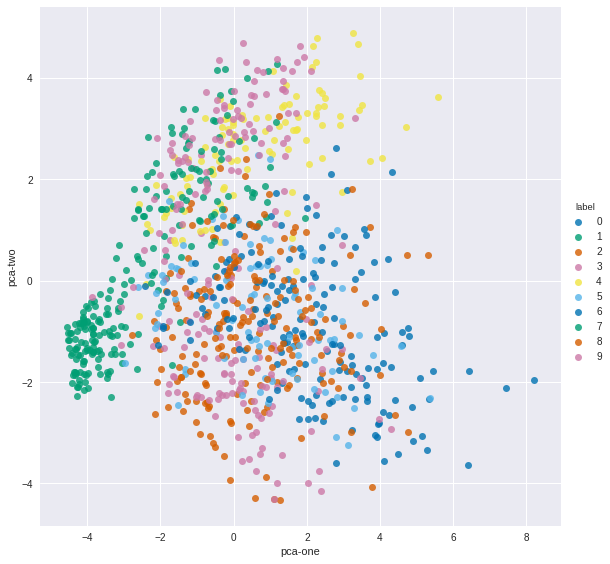

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.037s...
[t-SNE] Computed neighbors for 1000 samples in 1.478s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.674543
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.373047
[t-SNE] KL divergence after 300 iterations: 1.320106


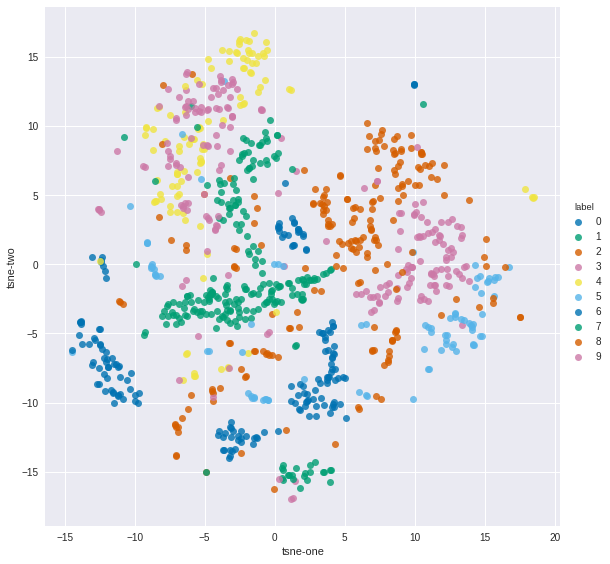

layer: 2


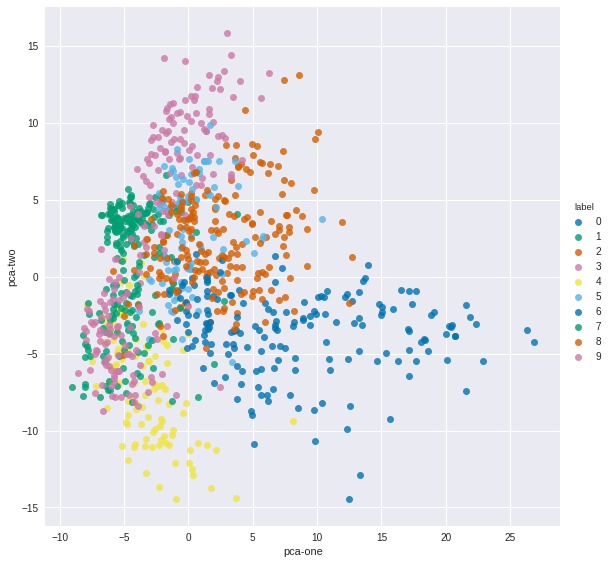

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.045s...
[t-SNE] Computed neighbors for 1000 samples in 1.942s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 6.252290
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.592453
[t-SNE] KL divergence after 300 iterations: 0.926688


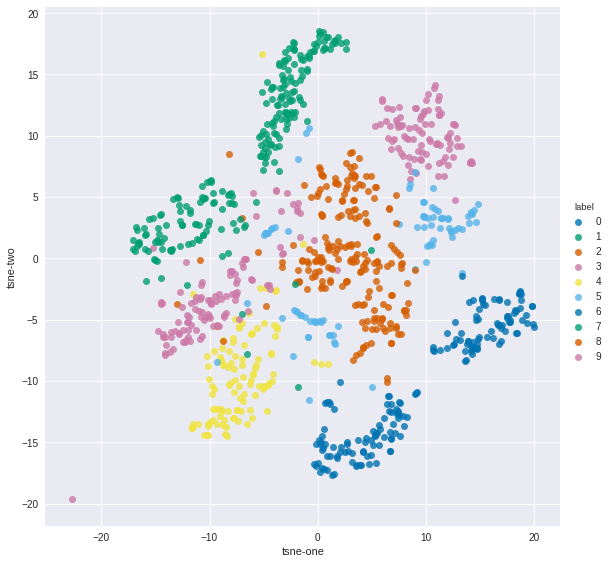

layer: 4


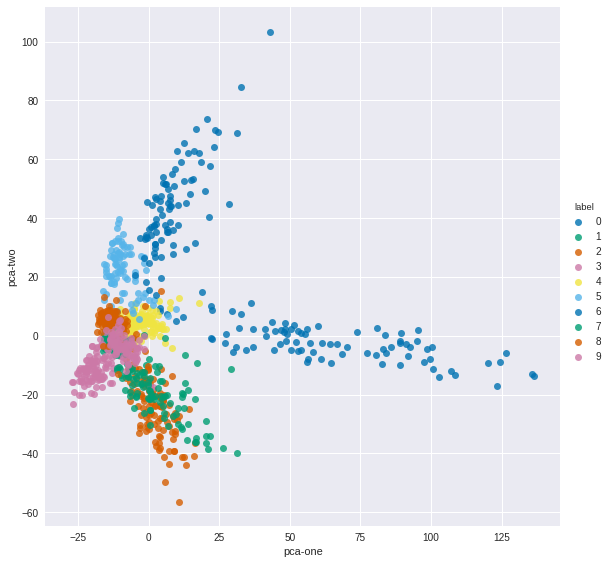

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.039s...
[t-SNE] Computed neighbors for 1000 samples in 1.954s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 13.945651
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.087353
[t-SNE] KL divergence after 300 iterations: 0.565659


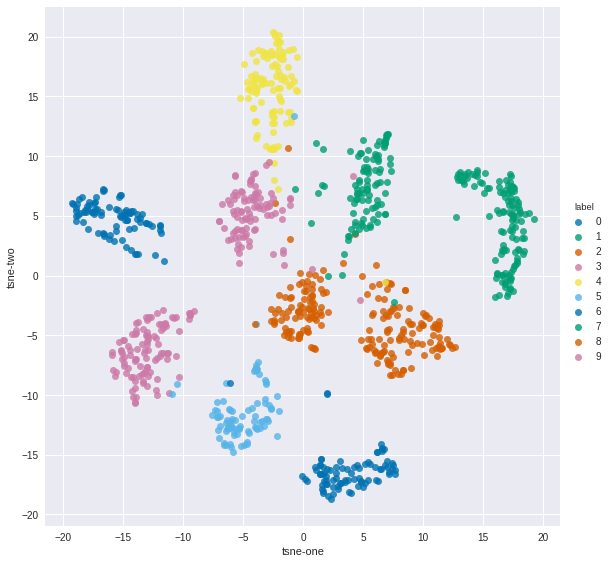

layer: 6


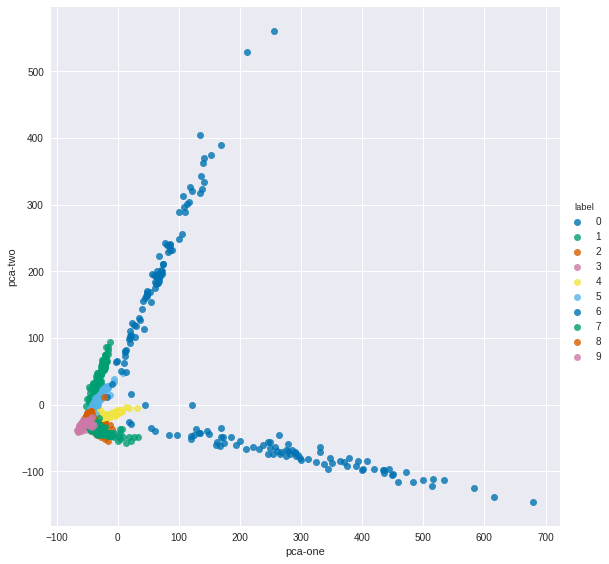

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.035s...
[t-SNE] Computed neighbors for 1000 samples in 1.793s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 15.800916
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.661976
[t-SNE] KL divergence after 300 iterations: 0.405000


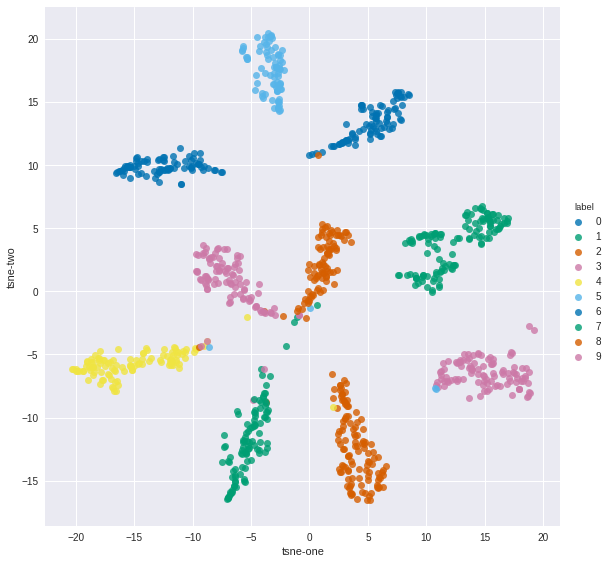

layer: 8


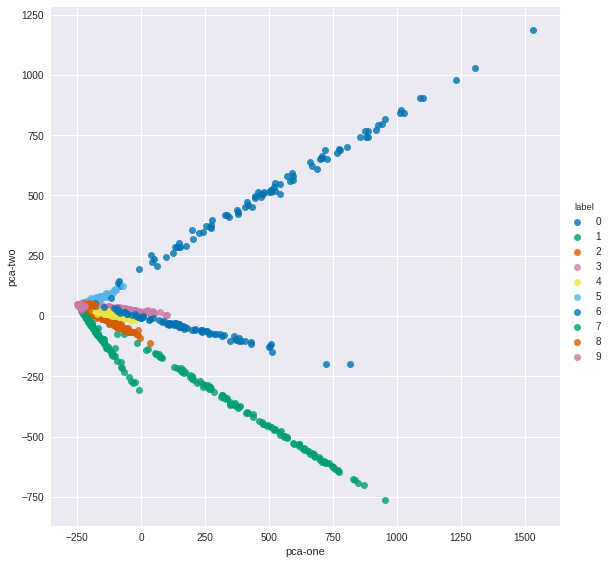

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.037s...
[t-SNE] Computed neighbors for 1000 samples in 1.342s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 30.116728
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.728012
[t-SNE] KL divergence after 300 iterations: 0.290277


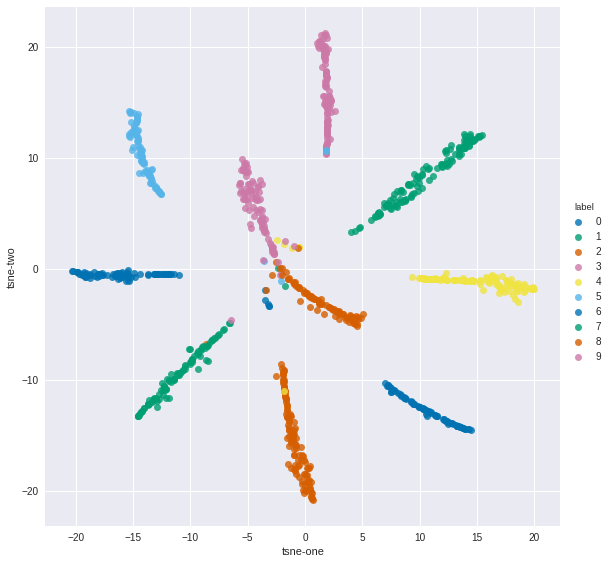

layer: 10


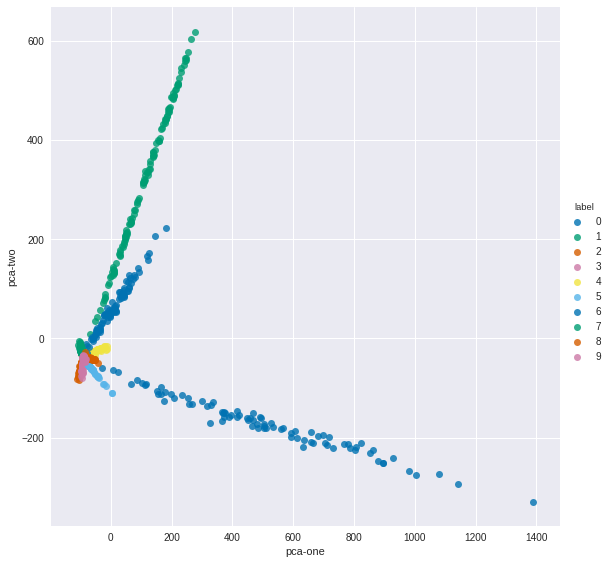

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.036s...
[t-SNE] Computed neighbors for 1000 samples in 1.662s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 11.157591
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.137051
[t-SNE] KL divergence after 300 iterations: 0.296580


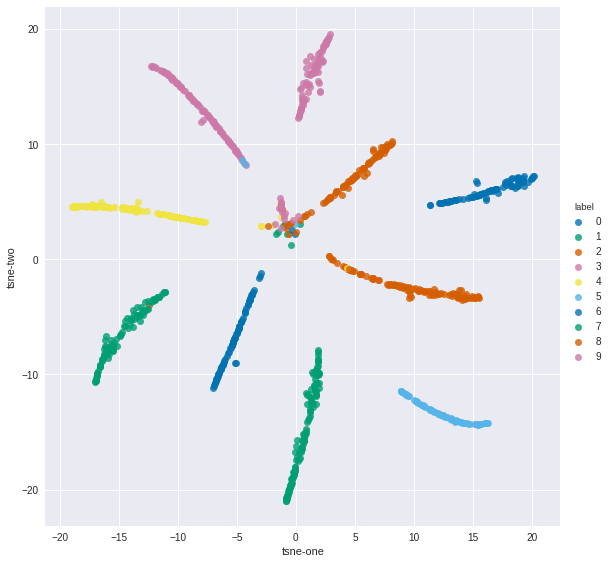

In [0]:
i=1
fig= plt.figure()
for l in lastlayer:
  #plt.subplot(6, 2, i)
  print("layer:",i/2)
  getpca(l,ytest.argmax(axis=1))
  #ax.pl
  #plt.subplot(6, 2, i+1)
  getSNE(l,ytest.argmax(axis=1))       
  #ax2.pl2
  i+=2

## Thank You
Dhruuv agarwal

Part 2 in separate notebook...
